In [20]:
using Distributions
using Plots
using StatsPlots

# Discrete Inverse Transform Sampler for Poisson Distribution

In [3]:
function Poisson_sample(λ)
    U = rand(Uniform())
    i = 0
    p = exp(-λ)
    A = p
    while(U>=A)
        p = (λ/(i+1))*p
        A = A + p
        i = i + 1
    end
    return i
end

Poisson_sample (generic function with 1 method)

In [13]:
repeats = 10000
samples = []
λ = 5
for i in 1:repeats
    push!(samples, Poisson_sample(λ))
end
μ = mean(samples)
σ = var(samples)
println(μ)
println(σ)

4.973
5.0335743574357315


### we see that the sample mean and variance are pretty close to the actual values.


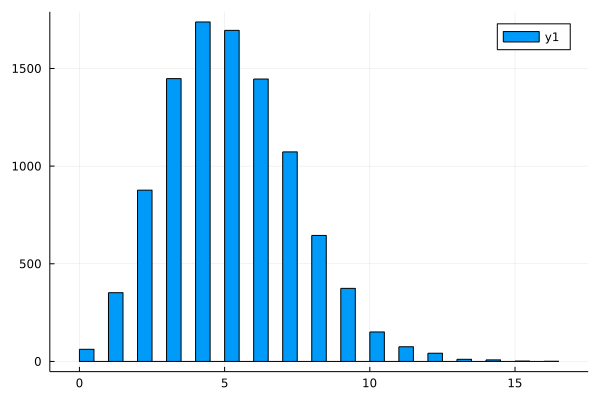

In [14]:
plot(histogram(samples))

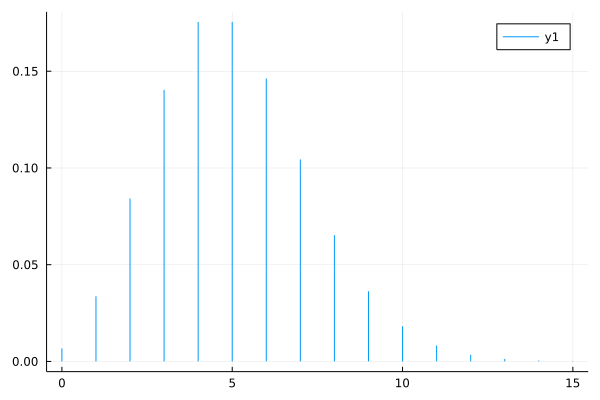

In [15]:
plot(Poisson(λ))

# Discrete Accept Reject Sampler for Binomial Distribution

In [5]:
function Binomial_sample(n, p)
    c = 1.41
    if (n*(1-p)-floor(n*(1-p)))<=p
        λ = n-floor(n*(1-p))
    else
        λ = (p*(floor(n*(1-p))+1))/(1-p)
    end
    U = rand(Uniform())
    Y = Poisson_sample(λ)
    if(n<Y)
        x = 0
    else
        x = ((factorial(n)*((1-p)^(n-Y))*(p^Y))/(c*factorial(n-Y)*exp(-λ)*(λ^Y)))
    end
    while(U>=x) 
        U = rand(Uniform())
        Y = Poisson_sample(λ)
        if(n<Y)
            x = 0
        else
            x = ((factorial(n)*((1-p)^(n-Y))*(p^Y))/(c*factorial(n-Y)*exp(-λ)*(λ^Y)))
        end
    end
    return Y
end

Binomial_sample (generic function with 1 method)

In [17]:
repeats = 10000
samples = []
n = 20
p = 0.4
for i in 1:repeats
    push!(samples, Binomial_sample(n,p))
end
μ = mean(samples)
σ = var(samples)
println(μ)
println(σ)

8.0514
4.780636103610345


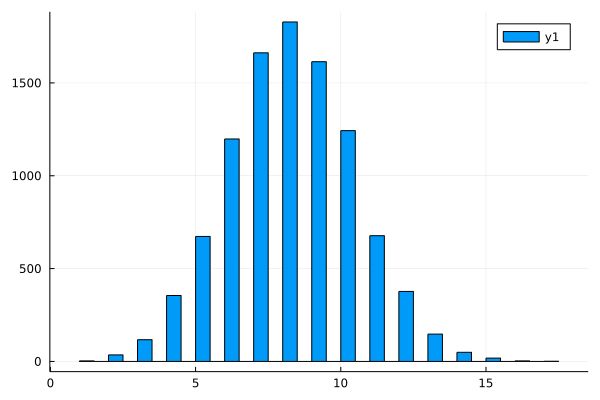

In [18]:
plot(histogram(samples))

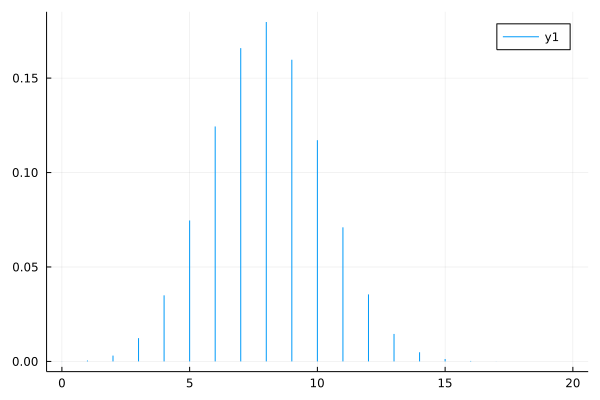

In [19]:
plot(Binomial(n,p))

### we see that the sample mean and variance are pretty close to the actual values 8 and 4.8